In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import copy

from sklearn import preprocessing, linear_model,svm
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,LeaveOneOut,cross_val_score,StratifiedKFold,StratifiedShuffleSplit
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import f1_score,accuracy_score,classification_report

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

## Methods used

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy

def custom_cv_kfolds(X,kFold):
    n, i = X.shape[0], 1
    while(i<=kFold): 
        idx = np.arange(n * (i - 1) / kFold, n * i / kFold, dtype=int)
        yield idx, idx
        i += 1

def getKFoldPartitions(X,Y,K): # X=dataX_train,Y=yTrain not dataY_train
    partitions_x, partitions_y = [], []
    for indices in custom_cv_kfolds(X,K):  # gets indices of partitions
        temp_X, temp_Y = [], []
        for i in indices[0]:
            temp_X.append(X[i])
            temp_Y.append(Y[i])  # yTrain, not dataY_train
        partitions_x.append(temp_X)
        partitions_y.append(temp_Y)
    return partitions_x, partitions_y

def modifyClasses(classNumber, Y):
    for i in range(0, len(Y)):
        if (Y[i] == classNumber):
            Y[i] = 1
        else:
            Y[i] = 0
    return Y

def plotBoundary(X,Y,model):
    Y = np.asarray(Y)
    X0, X1= X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.scatter(X0, X1, c=Y)
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plot_decision_regions(X, Y, model, legend=2)
    plt.show()

def OVRTrain(X,Y,gamma):
    classifiers=[]
    train_scores, train_accuracy = [], []
    for classNumber in range(0, len(data_classes)):
        print('Class:', classNumber)
        yTrain=copy.deepcopy(Y)
        newY = modifyClasses(classNumber, yTrain)

        model = svm.SVC(kernel='rbf',gamma=gamma)
        model.fit(X, newY)
        
        name='RBF Kernel,OVR, class-'+str(classNumber)+'Gamma='+str(gamma)
        plt.title(name)
        plotBoundary(X,newY,model)
        
        trainScore = model.score(X, newY)
        yPred= model.predict(X)
        trainAccuracy=accuracy_score(newY, yPred)
        
        classifiers.append(model)
        train_scores.append(trainScore)
        train_accuracy.append(trainAccuracy)
        
    return classifiers, train_scores, train_accuracy

def OVRValidation(X,Y,classifiers):
    validation_scores, validation_accuracies=[], []
    for classNumber in range(0, len(data_classes)):
#         print('Class:', classNumber)
        yTrain=copy.deepcopy(Y)
        newY = modifyClasses(classNumber, yTrain)

        validationScore = classifiers[classNumber].score(X, newY)
        yPred= classifiers[classNumber].predict(X)
        validationAccuracy=accuracy_score(newY, yPred)
        
        validation_scores.append(validationScore)
        validation_accuracies.append(validationAccuracy)
    return validation_scores, validation_accuracies

def OVRTest(X,Y,classifiers):
    test_scores, test_accuracies=[], []
    for classNumber in range(0, len(data_classes)):
        yTrain=copy.deepcopy(Y)
        newY = modifyClasses(classNumber, yTrain)

        testScore = classifiers[classNumber].score(X, newY)
        yPred= classifiers[classNumber].predict(X)
        testAccuracy=accuracy_score(newY, yPred)
        
        test_scores.append(testScore)
        test_accuracies.append(testAccuracy)
    return test_scores, test_accuracies

def printScores(train_scores,validation_scores,test_scores):
    print('\nScores:')
    for i in range(len(train_scores)):
        print('Class:',i,'\tTrainScore:',train_scores[i],' ValidationScore:', validation_scores[i],' TestScore:',test_scores[i])
    print()
        
def printAccuracies(train_acc,validation_acc,test_acc):
    print('\nAccuracies')
    for i in range(len(train_acc)):
        print('Class:',i,'\tTrainAcc:',train_acc[i],' ValidationAcc:', validation_acc[i],' TestAcc:',test_acc[i])
    print() 
        
gammaList=[1,10,100,1000,10000]
param_grid = dict(gamma=gammaList)
KFold = 10

### IRIS Dataset

In [3]:
data=pd.read_csv(r"C:\Users\Subhani\Documents\Jupyter AML\Assignments\Assignment_2\iris\iris-species\iris.csv")
data_classes={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

data_X=data.iloc[:,1:5].values
data_X=data.iloc[:,1:3].values ######## taken first 2 features
data_Y_names=data.iloc[:,5].values

data_Y=[]
for i in data_Y_names:
    data_Y.append(data_classes[i])

dataX_train, dataX_test, dataY_train, dataY_test = train_test_split(data_X, data_Y, test_size=0.2,
                                                                        random_state=20)

dataX_train.shape

(120, 2)

### RBF Kernel

In [4]:
def accuracy(X,Y,model):
    yPred=model.predict(X)
    acc=accuracy_score(Y,yPred)
    print(classification_report(Y,yPred))
    return acc



*************Gamma= 1 *************
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.75      0.77      0.76        39
           2       0.76      0.74      0.75        39

   micro avg       0.84      0.84      0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.70      0.64      0.67        11
           2       0.67      0.73      0.70        11

   micro avg       0.77      0.77      0.77        30
   macro avg       0.79      0.79      0.79        30
weighted avg       0.77      0.77  

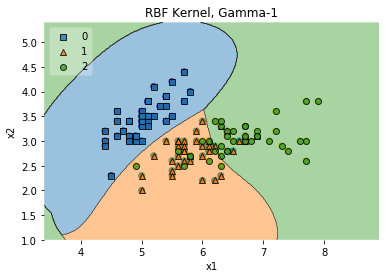



*************Gamma= 10 *************
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.83      0.77      0.80        39
           2       0.79      0.85      0.81        39

   micro avg       0.88      0.88      0.88       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.88      0.88      0.87       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.67      0.55      0.60        11
           2       0.62      0.73      0.67        11

   micro avg       0.73      0.73      0.73        30
   macro avg       0.76      0.76      0.76        30
weighted avg       0.74      0.73

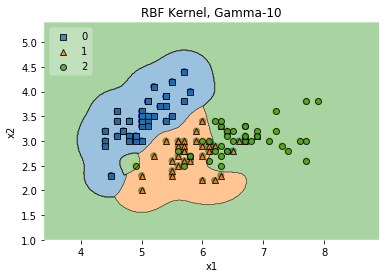



*************Gamma= 100 *************
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.92      0.87      0.89        39
           2       0.88      0.92      0.90        39

   micro avg       0.93      0.93      0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.57      0.36      0.44        11
           2       0.53      0.73      0.62        11

   micro avg       0.67      0.67      0.67        30
   macro avg       0.70      0.70      0.69        30
weighted avg       0.67      0.

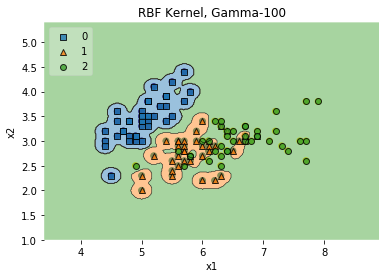



*************Gamma= 1000 *************
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1000, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.94      0.87      0.91        39
           2       0.88      0.95      0.91        39

   micro avg       0.94      0.94      0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.67      0.36      0.47        11
           2       0.43      0.82      0.56        11

   micro avg       0.53      0.53      0.53        30
   macro avg       0.70      0.52      0.53        30
weighted avg       0.67      

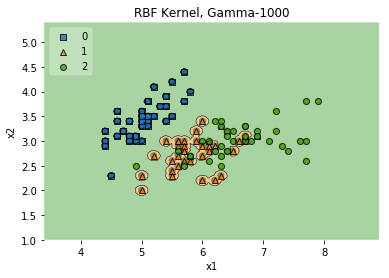



*************Gamma= 10000 *************
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10000, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      0.85      0.90        39
           2       0.86      0.97      0.92        39

   micro avg       0.94      0.94      0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.95      0.94      0.94       120

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.67      0.36      0.47        11
           2       0.43      0.82      0.56        11

   micro avg       0.53      0.53      0.53        30
   macro avg       0.70      0.52      0.53        30
weighted avg       0.67    

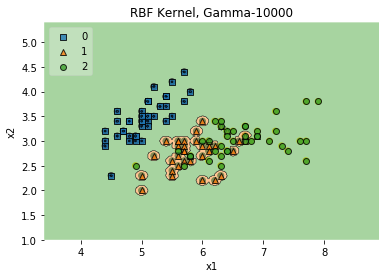

In [8]:
for gamma in gammaList:
    print('\n\n*************Gamma=',gamma,'*************')
    rbfModel = svm.SVC(kernel='rbf',gamma=gamma)
    rbfModel.fit(dataX_train, dataY_train)
    print(rbfModel)

    trainAccuracy = accuracy(dataX_train, dataY_train, rbfModel)
    testAccuracy = accuracy(dataX_test, dataY_test, rbfModel)
    print('Train Accuracy:',trainAccuracy,'\nTest Accuracy:',testAccuracy)

    X, Y = dataX_train, np.asarray(dataY_train)
    name='RBF Kernel, Gamma-'+str(gamma)
    plt.title(name)
    plotBoundary(X,Y,rbfModel)

### OVA , KFold



******************************Gamma= 1  K= 1 ******************************
Class: 0


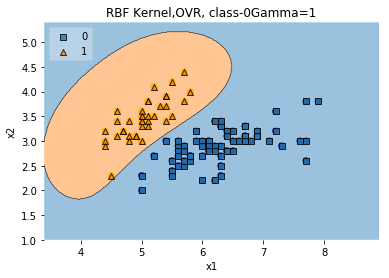

Class: 1


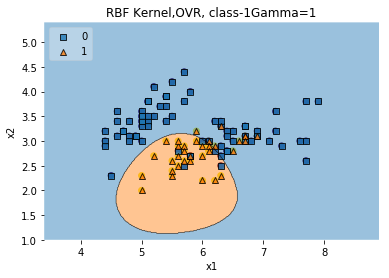

Class: 2


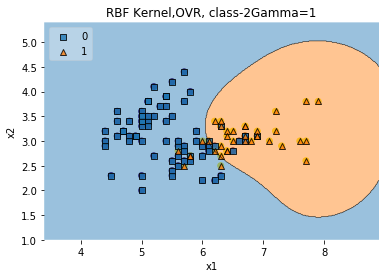


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8425925925925926  ValidationScore: 0.6666666666666666  TestScore: 0.7666666666666667
Class: 2 	TrainScore: 0.8611111111111112  ValidationScore: 0.75  TestScore: 0.7666666666666667


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.6666666666666666  TestAcc: 0.7666666666666667
Class: 2 	TrainAcc: 0.8611111111111112  ValidationAcc: 0.75  TestAcc: 0.7666666666666667



******************************Gamma= 1  K= 2 ******************************
Class: 0


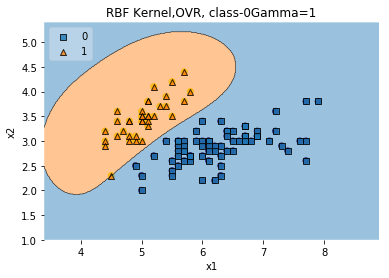

Class: 1


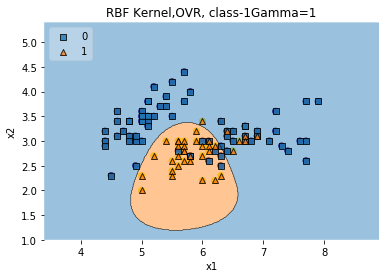

Class: 2


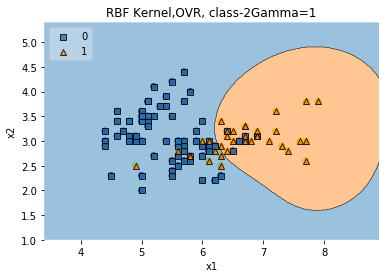


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8518518518518519  ValidationScore: 0.75  TestScore: 0.7
Class: 2 	TrainScore: 0.8518518518518519  ValidationScore: 0.6666666666666666  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8518518518518519  ValidationAcc: 0.75  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8518518518518519  ValidationAcc: 0.6666666666666666  TestAcc: 0.7333333333333333



******************************Gamma= 1  K= 3 ******************************
Class: 0


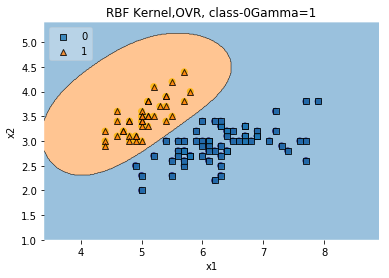

Class: 1


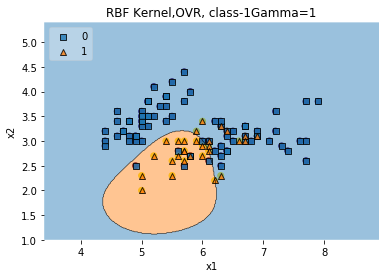

Class: 2


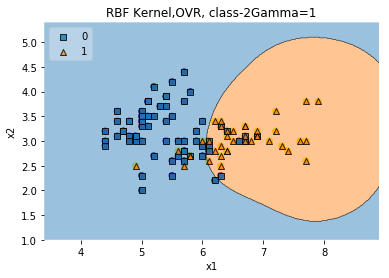


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.9166666666666666  TestScore: 1.0
Class: 1 	TrainScore: 0.8240740740740741  ValidationScore: 0.75  TestScore: 0.7
Class: 2 	TrainScore: 0.8518518518518519  ValidationScore: 0.75  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.9166666666666666  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8240740740740741  ValidationAcc: 0.75  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8518518518518519  ValidationAcc: 0.75  TestAcc: 0.7



******************************Gamma= 1  K= 4 ******************************
Class: 0


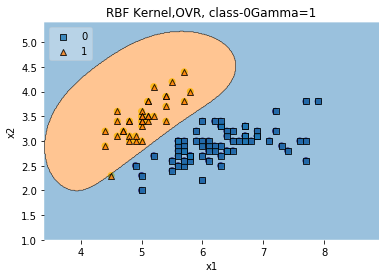

Class: 1


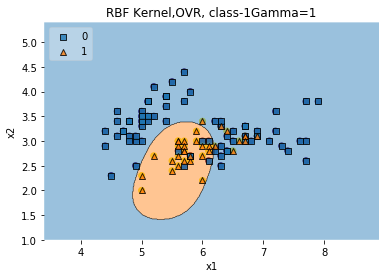

Class: 2


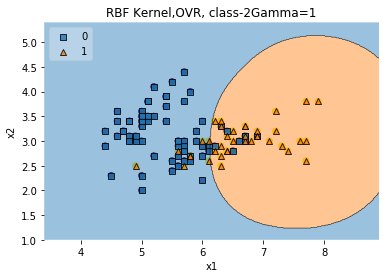


Scores:
Class: 0 	TrainScore: 0.9907407407407407  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8425925925925926  ValidationScore: 0.8333333333333334  TestScore: 0.7
Class: 2 	TrainScore: 0.8425925925925926  ValidationScore: 0.9166666666666666  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 0.9907407407407407  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.8333333333333334  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.9166666666666666  TestAcc: 0.7333333333333333



******************************Gamma= 1  K= 5 ******************************
Class: 0


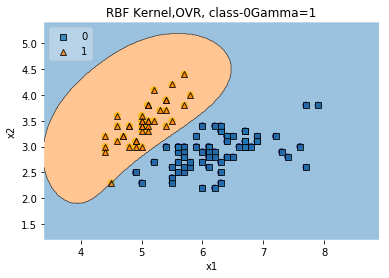

Class: 1


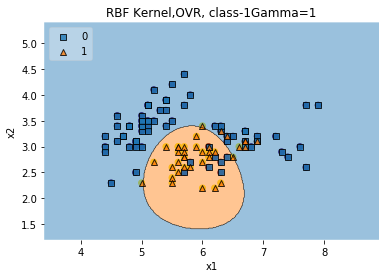

Class: 2


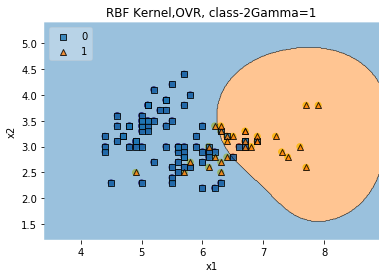


Scores:
Class: 0 	TrainScore: 0.9907407407407407  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8425925925925926  ValidationScore: 0.5  TestScore: 0.7
Class: 2 	TrainScore: 0.8333333333333334  ValidationScore: 0.5833333333333334  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 0.9907407407407407  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.5  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8333333333333334  ValidationAcc: 0.5833333333333334  TestAcc: 0.7



******************************Gamma= 1  K= 6 ******************************
Class: 0


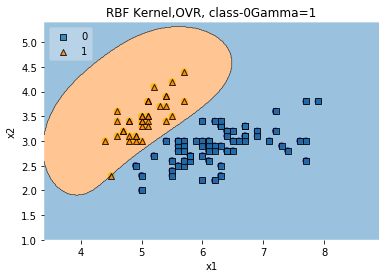

Class: 1


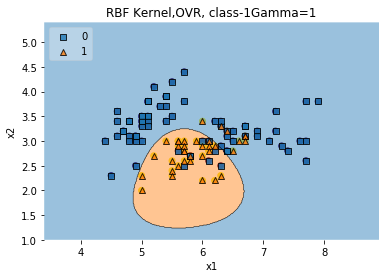

Class: 2


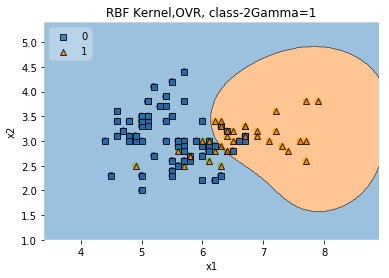


Scores:
Class: 0 	TrainScore: 0.9907407407407407  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8425925925925926  ValidationScore: 0.8333333333333334  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.8425925925925926  ValidationScore: 0.8333333333333334  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 0.9907407407407407  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.8333333333333334  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.8333333333333334  TestAcc: 0.7



******************************Gamma= 1  K= 7 ******************************
Class: 0


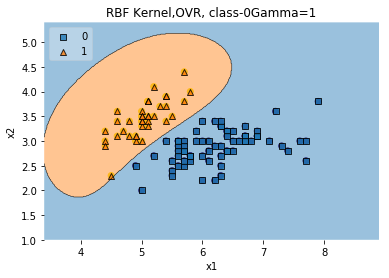

Class: 1


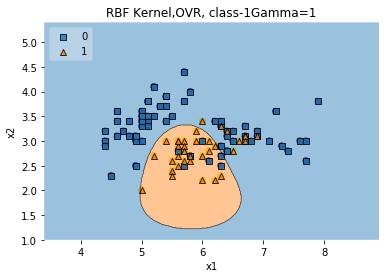

Class: 2


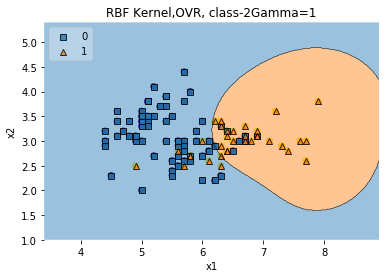


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8425925925925926  ValidationScore: 0.75  TestScore: 0.7333333333333333
Class: 2 	TrainScore: 0.8425925925925926  ValidationScore: 0.8333333333333334  TestScore: 0.7666666666666667


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.75  TestAcc: 0.7333333333333333
Class: 2 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.8333333333333334  TestAcc: 0.7666666666666667



******************************Gamma= 1  K= 8 ******************************
Class: 0


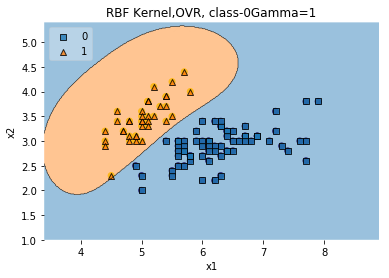

Class: 1


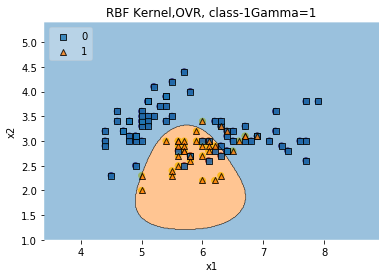

Class: 2


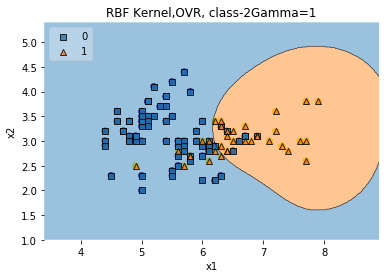


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8425925925925926  ValidationScore: 0.8333333333333334  TestScore: 0.7
Class: 2 	TrainScore: 0.8425925925925926  ValidationScore: 0.8333333333333334  TestScore: 0.7666666666666667


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.8333333333333334  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.8333333333333334  TestAcc: 0.7666666666666667



******************************Gamma= 1  K= 9 ******************************
Class: 0


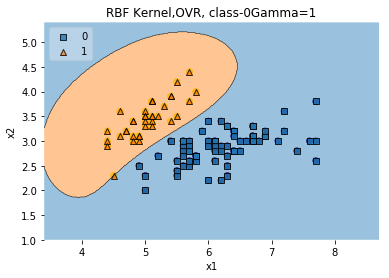

Class: 1


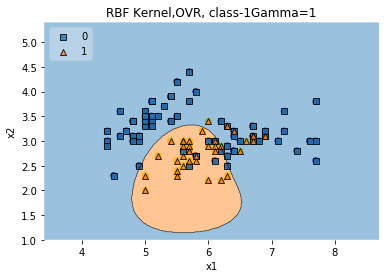

Class: 2


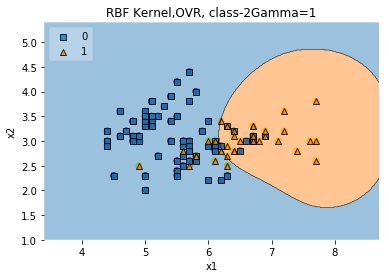


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8240740740740741  ValidationScore: 1.0  TestScore: 0.7666666666666667
Class: 2 	TrainScore: 0.8240740740740741  ValidationScore: 1.0  TestScore: 0.7666666666666667


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8240740740740741  ValidationAcc: 1.0  TestAcc: 0.7666666666666667
Class: 2 	TrainAcc: 0.8240740740740741  ValidationAcc: 1.0  TestAcc: 0.7666666666666667



******************************Gamma= 1  K= 10 ******************************
Class: 0


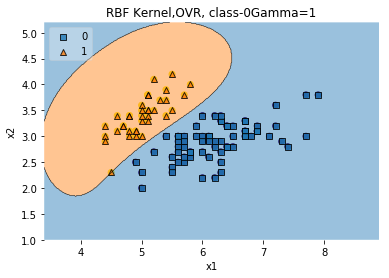

Class: 1


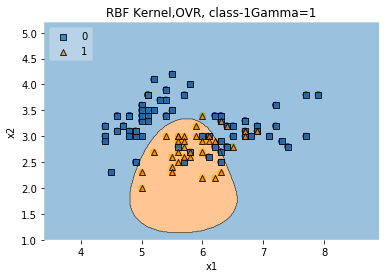

Class: 2


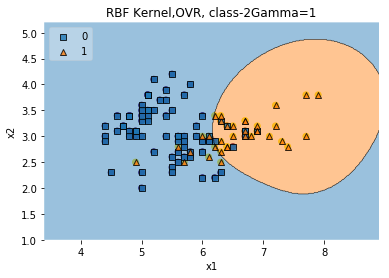


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8425925925925926  ValidationScore: 0.8333333333333334  TestScore: 0.7333333333333333
Class: 2 	TrainScore: 0.8425925925925926  ValidationScore: 0.8333333333333334  TestScore: 0.7666666666666667


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.8333333333333334  TestAcc: 0.7333333333333333
Class: 2 	TrainAcc: 0.8425925925925926  ValidationAcc: 0.8333333333333334  TestAcc: 0.7666666666666667



 Mean Scores and Accuracies: 
Train Score mean: [0.90123457 0.90123457 0.89197531 0.89197531 0.88888889 0.89197531
 0.89506173 0.89506173 0.88271605 0.89506173] 
Validation Score mean: [0.80555556 0.80555556 0.80555556 0.91666667 0.69444444 0.88888889
 0.86111111 0.88888889 1.         0.88888889] \Test Score mean: [0.84444444 0.81111111 0.8        0.81111111 0.8        0.78888889
 0.83333333 0.82222222 0.84444444 0.83333333] 

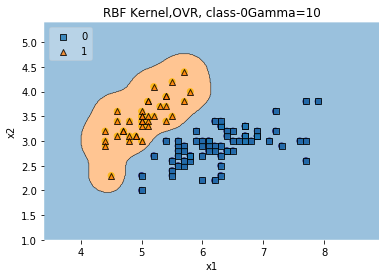

Class: 1


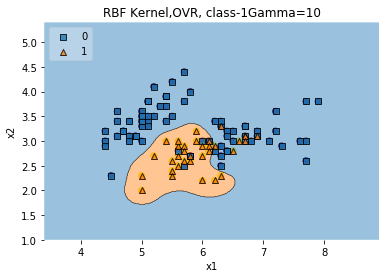

Class: 2


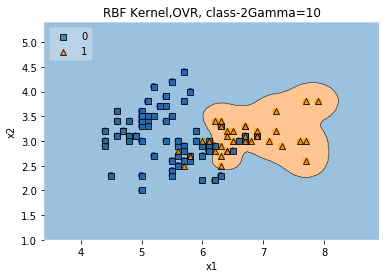


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8703703703703703  ValidationScore: 0.6666666666666666  TestScore: 0.7333333333333333
Class: 2 	TrainScore: 0.8703703703703703  ValidationScore: 0.75  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8703703703703703  ValidationAcc: 0.6666666666666666  TestAcc: 0.7333333333333333
Class: 2 	TrainAcc: 0.8703703703703703  ValidationAcc: 0.75  TestAcc: 0.7



******************************Gamma= 10  K= 2 ******************************
Class: 0


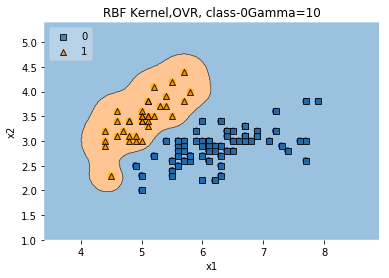

Class: 1


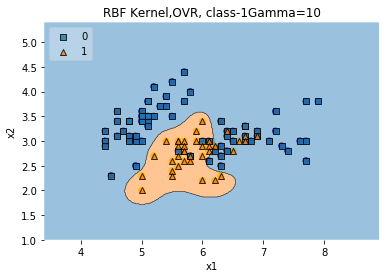

Class: 2


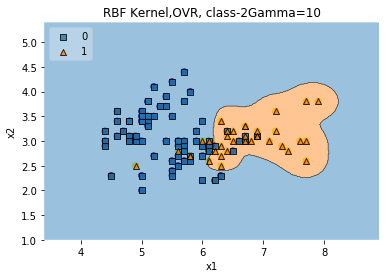


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8888888888888888  ValidationScore: 0.75  TestScore: 0.7
Class: 2 	TrainScore: 0.8796296296296297  ValidationScore: 0.75  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8888888888888888  ValidationAcc: 0.75  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8796296296296297  ValidationAcc: 0.75  TestAcc: 0.7



******************************Gamma= 10  K= 3 ******************************
Class: 0


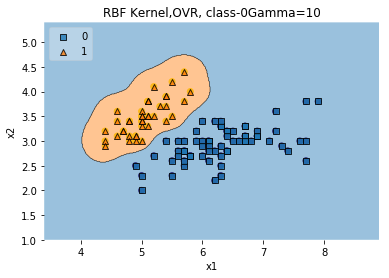

Class: 1


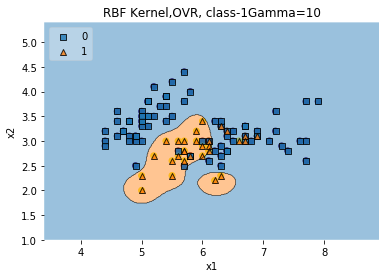

Class: 2


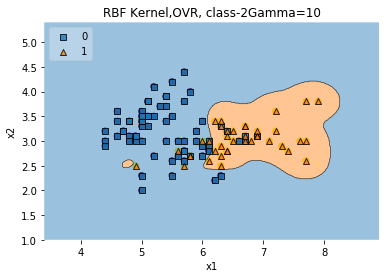


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.9166666666666666  TestScore: 1.0
Class: 1 	TrainScore: 0.8888888888888888  ValidationScore: 0.75  TestScore: 0.7
Class: 2 	TrainScore: 0.8796296296296297  ValidationScore: 0.75  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.9166666666666666  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8888888888888888  ValidationAcc: 0.75  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8796296296296297  ValidationAcc: 0.75  TestAcc: 0.7



******************************Gamma= 10  K= 4 ******************************
Class: 0


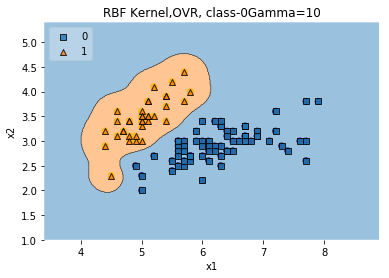

Class: 1


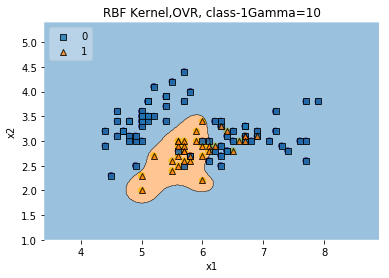

Class: 2


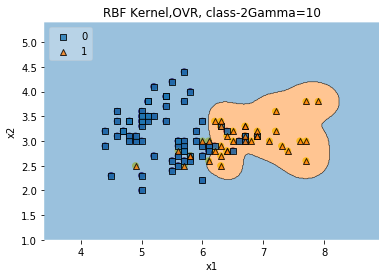


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8611111111111112  ValidationScore: 0.8333333333333334  TestScore: 0.7
Class: 2 	TrainScore: 0.8518518518518519  ValidationScore: 0.9166666666666666  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8611111111111112  ValidationAcc: 0.8333333333333334  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8518518518518519  ValidationAcc: 0.9166666666666666  TestAcc: 0.7



******************************Gamma= 10  K= 5 ******************************
Class: 0


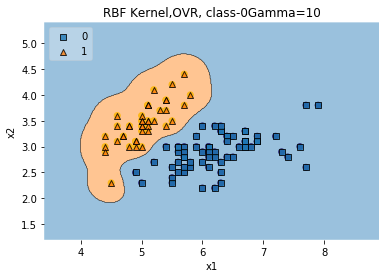

Class: 1


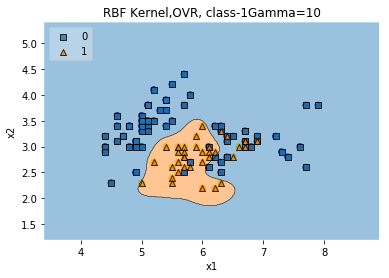

Class: 2


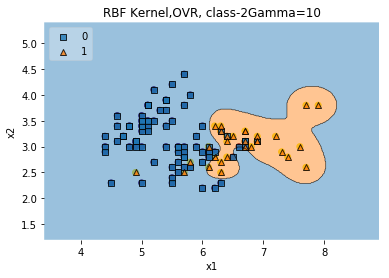


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8888888888888888  ValidationScore: 0.6666666666666666  TestScore: 0.7
Class: 2 	TrainScore: 0.8796296296296297  ValidationScore: 0.6666666666666666  TestScore: 0.7666666666666667


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8888888888888888  ValidationAcc: 0.6666666666666666  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8796296296296297  ValidationAcc: 0.6666666666666666  TestAcc: 0.7666666666666667



******************************Gamma= 10  K= 6 ******************************
Class: 0


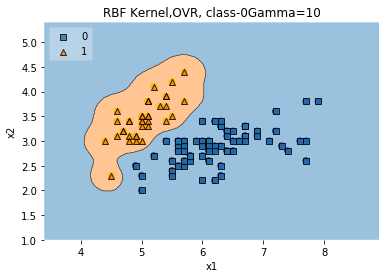

Class: 1


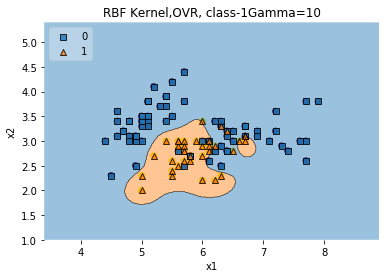

Class: 2


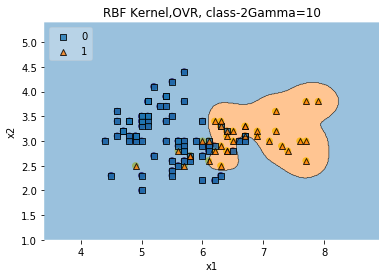


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8796296296296297  ValidationScore: 0.75  TestScore: 0.7666666666666667
Class: 2 	TrainScore: 0.8796296296296297  ValidationScore: 0.75  TestScore: 0.7666666666666667


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8796296296296297  ValidationAcc: 0.75  TestAcc: 0.7666666666666667
Class: 2 	TrainAcc: 0.8796296296296297  ValidationAcc: 0.75  TestAcc: 0.7666666666666667



******************************Gamma= 10  K= 7 ******************************
Class: 0


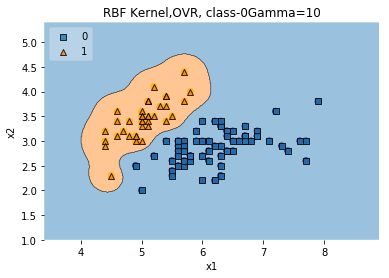

Class: 1


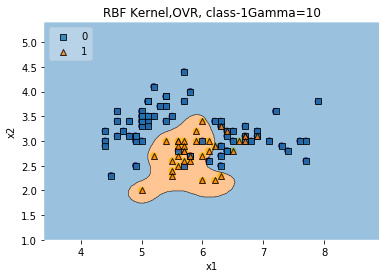

Class: 2


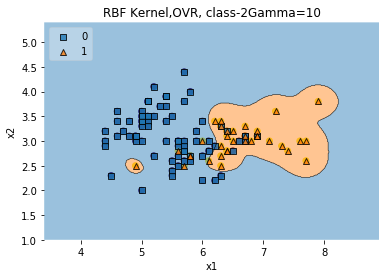


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8796296296296297  ValidationScore: 0.8333333333333334  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.8796296296296297  ValidationScore: 0.9166666666666666  TestScore: 0.6666666666666666


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8796296296296297  ValidationAcc: 0.8333333333333334  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.8796296296296297  ValidationAcc: 0.9166666666666666  TestAcc: 0.6666666666666666



******************************Gamma= 10  K= 8 ******************************
Class: 0


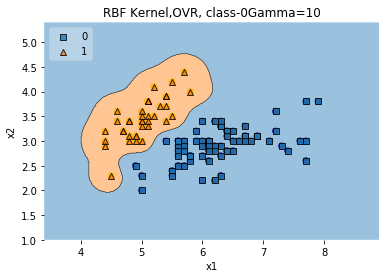

Class: 1


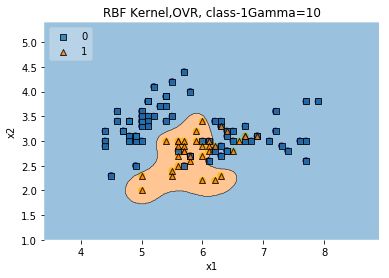

Class: 2


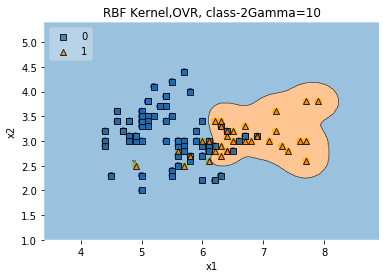


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8703703703703703  ValidationScore: 0.8333333333333334  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.8518518518518519  ValidationScore: 0.9166666666666666  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8703703703703703  ValidationAcc: 0.8333333333333334  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.8518518518518519  ValidationAcc: 0.9166666666666666  TestAcc: 0.7



******************************Gamma= 10  K= 9 ******************************
Class: 0


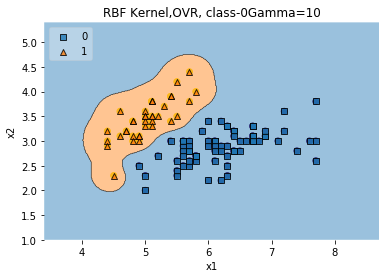

Class: 1


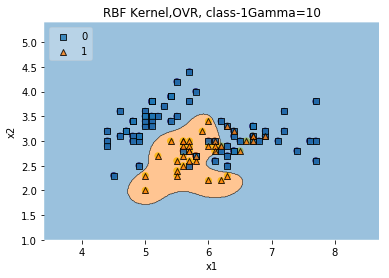

Class: 2


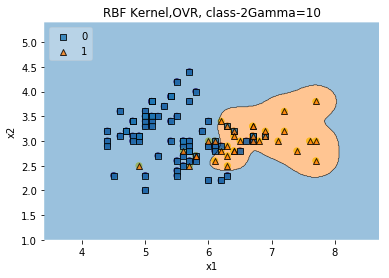


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8611111111111112  ValidationScore: 1.0  TestScore: 0.7
Class: 2 	TrainScore: 0.8518518518518519  ValidationScore: 1.0  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8611111111111112  ValidationAcc: 1.0  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8518518518518519  ValidationAcc: 1.0  TestAcc: 0.7



******************************Gamma= 10  K= 10 ******************************
Class: 0


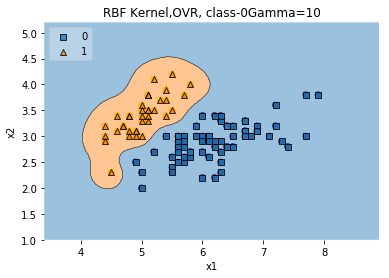

Class: 1


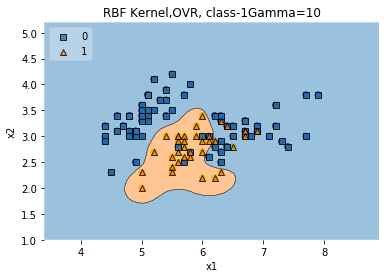

Class: 2


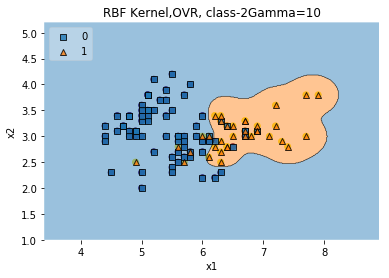


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.8796296296296297  ValidationScore: 0.8333333333333334  TestScore: 0.7
Class: 2 	TrainScore: 0.8703703703703703  ValidationScore: 0.8333333333333334  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.8796296296296297  ValidationAcc: 0.8333333333333334  TestAcc: 0.7
Class: 2 	TrainAcc: 0.8703703703703703  ValidationAcc: 0.8333333333333334  TestAcc: 0.7



 Mean Scores and Accuracies: 
Train Score mean: [0.91358025 0.92283951 0.92283951 0.90432099 0.92283951 0.91975309
 0.91975309 0.90740741 0.90432099 0.91666667] 
Validation Score mean: [0.80555556 0.83333333 0.80555556 0.91666667 0.77777778 0.83333333
 0.91666667 0.91666667 1.         0.88888889] \Test Score mean: [0.81111111 0.8        0.8        0.8        0.82222222 0.84444444
 0.77777778 0.78888889 0.8        0.8       ] 
Train Accuracy mean: [0.91358025 0.92283951 0.92283951 0.90

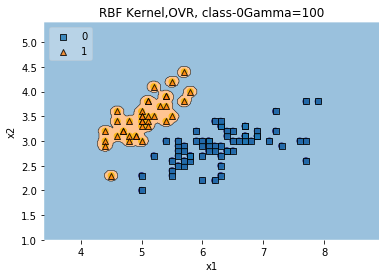

Class: 1


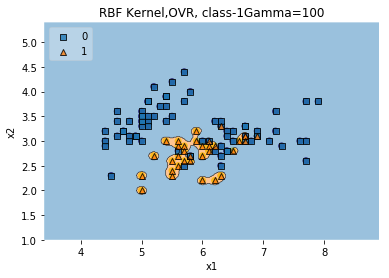

Class: 2


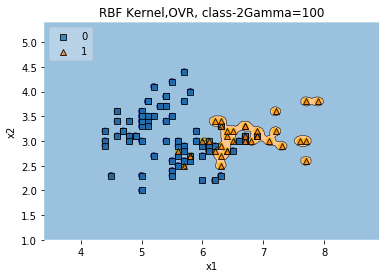


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.8333333333333334  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.9166666666666666  ValidationScore: 0.6666666666666666  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.8333333333333334  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.9166666666666666  ValidationAcc: 0.6666666666666666  TestAcc: 0.7



******************************Gamma= 100  K= 2 ******************************
Class: 0


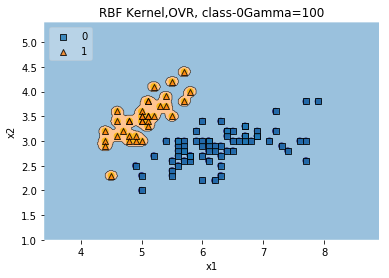

Class: 1


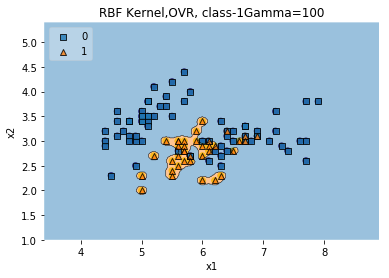

Class: 2


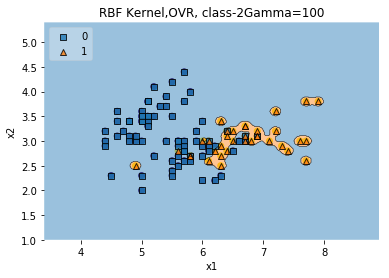


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.9166666666666666  TestScore: 0.9333333333333333
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.75  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.9259259259259259  ValidationScore: 0.75  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.9166666666666666  TestAcc: 0.9333333333333333
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.75  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.9259259259259259  ValidationAcc: 0.75  TestAcc: 0.7



******************************Gamma= 100  K= 3 ******************************
Class: 0


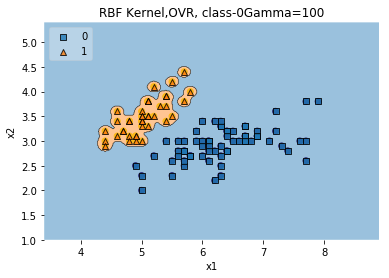

Class: 1


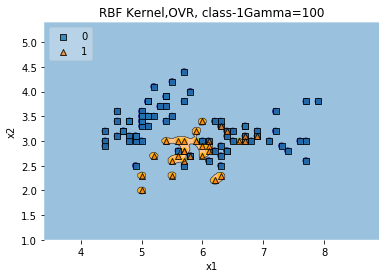

Class: 2


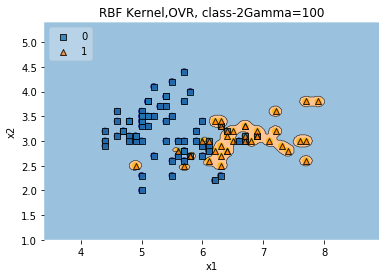


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.9166666666666666  TestScore: 1.0
Class: 1 	TrainScore: 0.9351851851851852  ValidationScore: 0.3333333333333333  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9351851851851852  ValidationScore: 0.8333333333333334  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.9166666666666666  TestAcc: 1.0
Class: 1 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.3333333333333333  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.8333333333333334  TestAcc: 0.7



******************************Gamma= 100  K= 4 ******************************
Class: 0


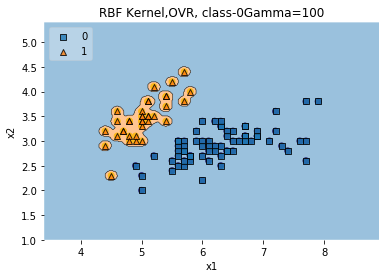

Class: 1


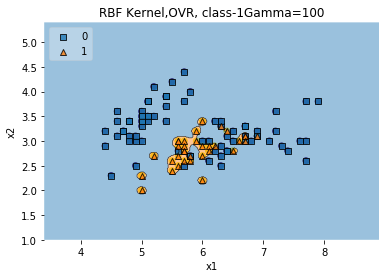

Class: 2


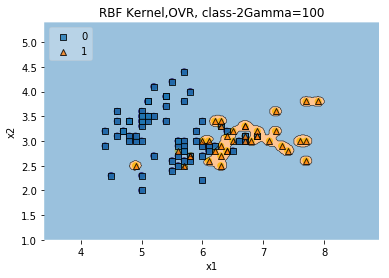


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.9166666666666666  TestScore: 0.9666666666666667
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.5833333333333334  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.9351851851851852  ValidationScore: 0.8333333333333334  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.9166666666666666  TestAcc: 0.9666666666666667
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.5833333333333334  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.8333333333333334  TestAcc: 0.7



******************************Gamma= 100  K= 5 ******************************
Class: 0


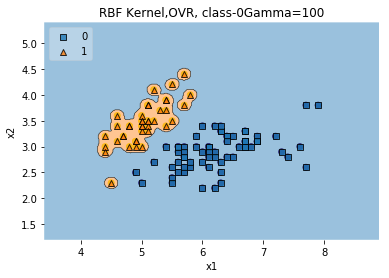

Class: 1


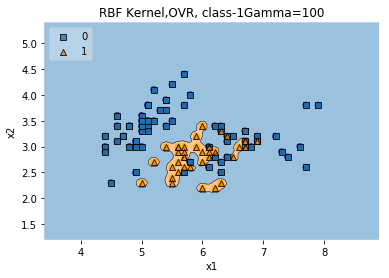

Class: 2


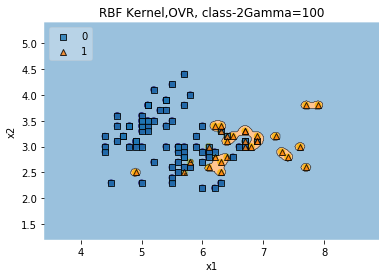


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 1.0  TestScore: 1.0
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.6666666666666666  TestScore: 0.7
Class: 2 	TrainScore: 0.9351851851851852  ValidationScore: 0.3333333333333333  TestScore: 0.6666666666666666


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 1.0  TestAcc: 1.0
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.6666666666666666  TestAcc: 0.7
Class: 2 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.3333333333333333  TestAcc: 0.6666666666666666



******************************Gamma= 100  K= 6 ******************************
Class: 0


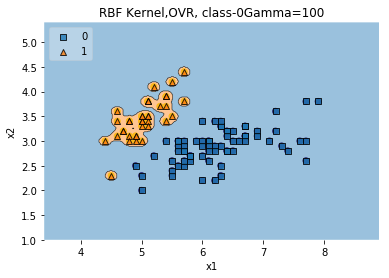

Class: 1


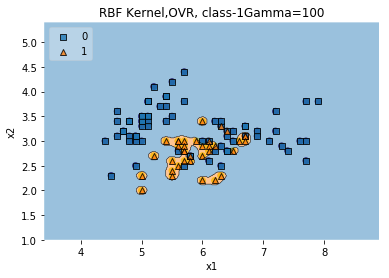

Class: 2


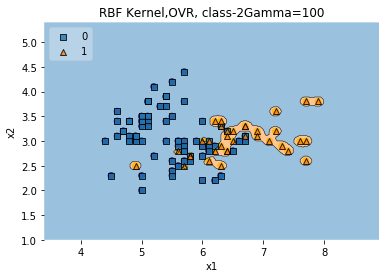


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.75  TestScore: 0.9666666666666667
Class: 1 	TrainScore: 0.9537037037037037  ValidationScore: 0.6666666666666666  TestScore: 0.7
Class: 2 	TrainScore: 0.9259259259259259  ValidationScore: 0.6666666666666666  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.75  TestAcc: 0.9666666666666667
Class: 1 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.6666666666666666  TestAcc: 0.7
Class: 2 	TrainAcc: 0.9259259259259259  ValidationAcc: 0.6666666666666666  TestAcc: 0.7



******************************Gamma= 100  K= 7 ******************************
Class: 0


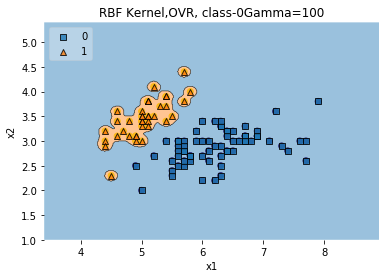

Class: 1


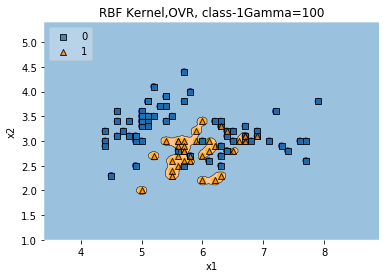

Class: 2


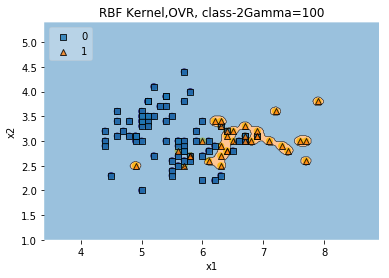


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.9166666666666666  TestScore: 1.0
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.6666666666666666  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.9166666666666666  ValidationScore: 0.6666666666666666  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.9166666666666666  TestAcc: 1.0
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.6666666666666666  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.9166666666666666  ValidationAcc: 0.6666666666666666  TestAcc: 0.7



******************************Gamma= 100  K= 8 ******************************
Class: 0


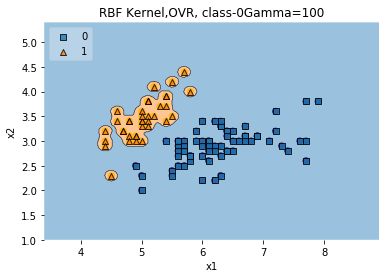

Class: 1


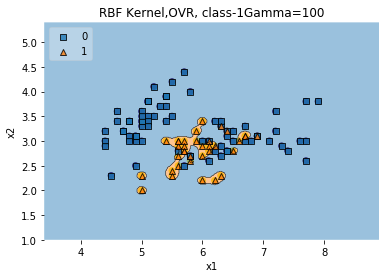

Class: 2


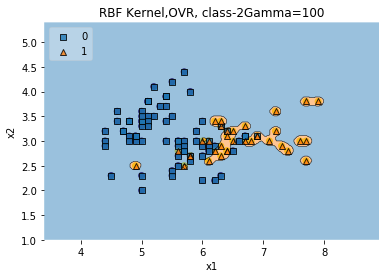


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 1.0
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.5833333333333334  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.9351851851851852  ValidationScore: 0.6666666666666666  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 1.0
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.5833333333333334  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.6666666666666666  TestAcc: 0.7333333333333333



******************************Gamma= 100  K= 9 ******************************
Class: 0


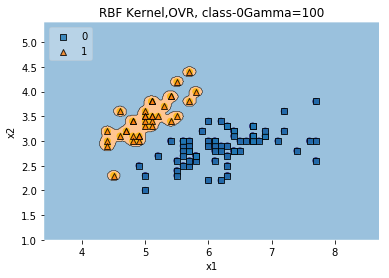

Class: 1


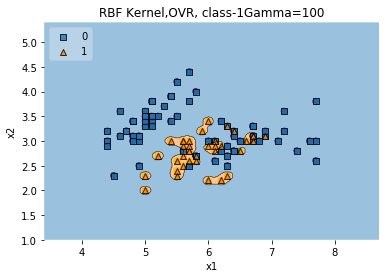

Class: 2


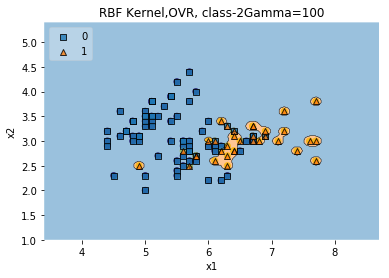


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 1.0
Class: 1 	TrainScore: 0.9351851851851852  ValidationScore: 0.8333333333333334  TestScore: 0.7
Class: 2 	TrainScore: 0.9166666666666666  ValidationScore: 0.6666666666666666  TestScore: 0.7


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 1.0
Class: 1 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.8333333333333334  TestAcc: 0.7
Class: 2 	TrainAcc: 0.9166666666666666  ValidationAcc: 0.6666666666666666  TestAcc: 0.7



******************************Gamma= 100  K= 10 ******************************
Class: 0


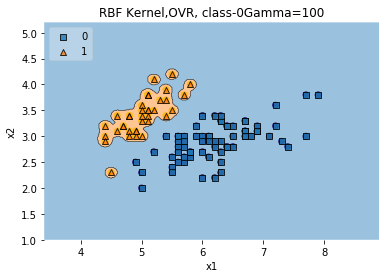

Class: 1


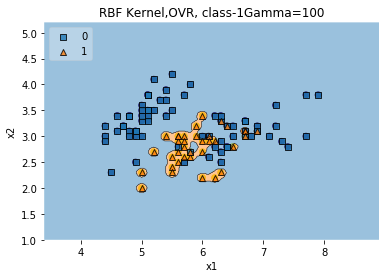

Class: 2


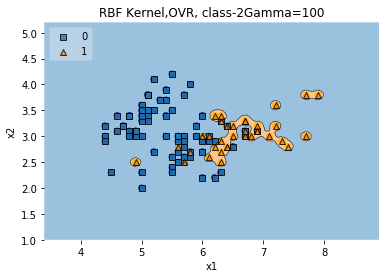


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 1.0
Class: 1 	TrainScore: 0.9351851851851852  ValidationScore: 0.75  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.9074074074074074  ValidationScore: 0.6666666666666666  TestScore: 0.7333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 1.0
Class: 1 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.75  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.9074074074074074  ValidationAcc: 0.6666666666666666  TestAcc: 0.7333333333333333



 Mean Scores and Accuracies: 
Train Score mean: [0.9537037  0.95679012 0.95679012 0.95987654 0.95987654 0.95987654
 0.9537037  0.95987654 0.95061728 0.94753086] 
Validation Score mean: [0.83333333 0.80555556 0.69444444 0.77777778 0.66666667 0.69444444
 0.75       0.69444444 0.77777778 0.75      ] \Test Score mean: [0.78888889 0.76666667 0.77777778 0.77777778 0.78888889 0.78888889
 0.78888889 0.8        0.8        0.8       

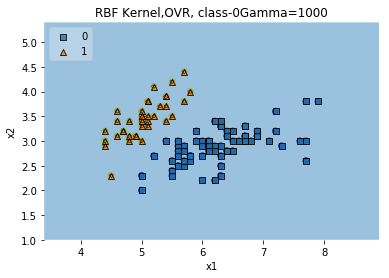

Class: 1


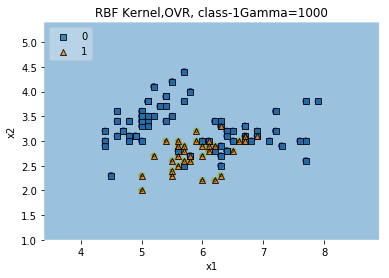

Class: 2


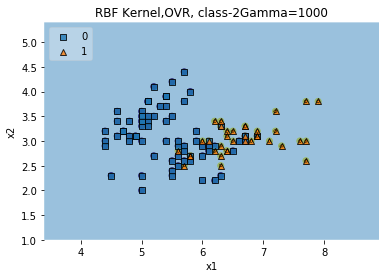


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.9166666666666666  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.75  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9444444444444444  ValidationScore: 0.6666666666666666  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.9166666666666666  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.75  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.6666666666666666  TestAcc: 0.6333333333333333



******************************Gamma= 1000  K= 2 ******************************
Class: 0


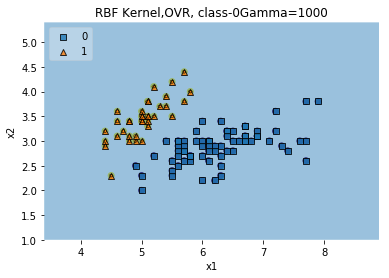

Class: 1


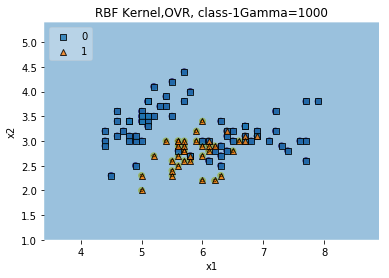

Class: 2


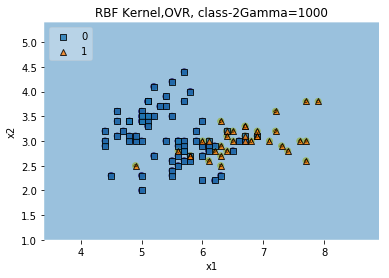


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 0.8
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.8333333333333334  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9444444444444444  ValidationScore: 0.75  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 0.8
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.8333333333333334  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.75  TestAcc: 0.6333333333333333



******************************Gamma= 1000  K= 3 ******************************
Class: 0


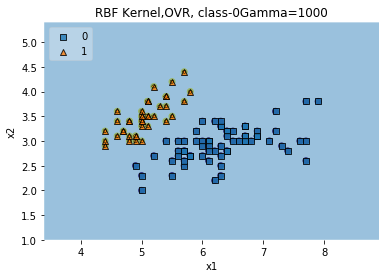

Class: 1


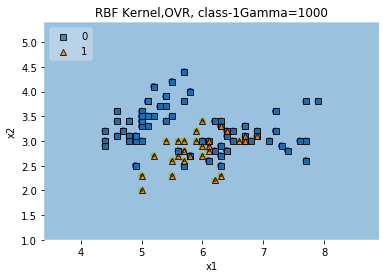

Class: 2


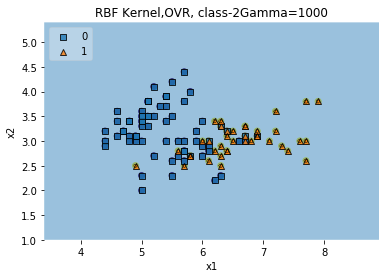


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9351851851851852  ValidationScore: 0.25  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9351851851851852  ValidationScore: 1.0  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.25  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9351851851851852  ValidationAcc: 1.0  TestAcc: 0.6333333333333333



******************************Gamma= 1000  K= 4 ******************************
Class: 0


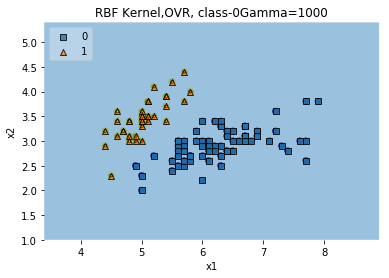

Class: 1


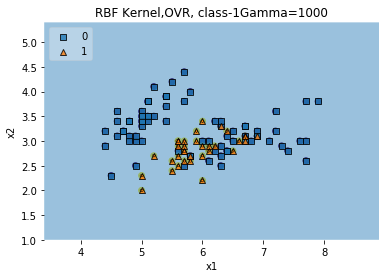

Class: 2


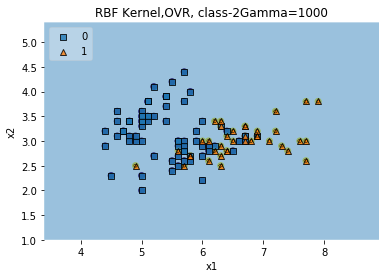


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.6666666666666666  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9537037037037037  ValidationScore: 0.5  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9537037037037037  ValidationScore: 0.8333333333333334  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.6666666666666666  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.5  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.8333333333333334  TestAcc: 0.6333333333333333



******************************Gamma= 1000  K= 5 ******************************
Class: 0


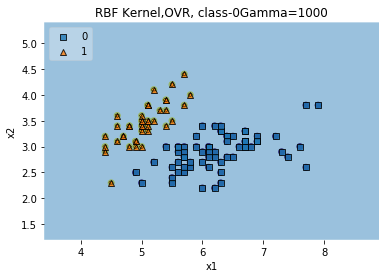

Class: 1


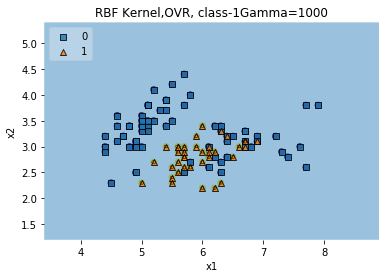

Class: 2


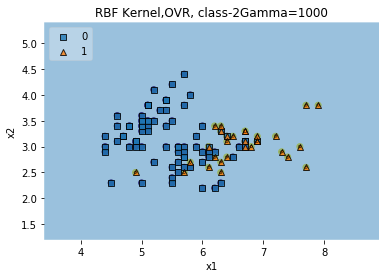


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.9166666666666666  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.8333333333333334  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9444444444444444  ValidationScore: 0.3333333333333333  TestScore: 0.5666666666666667


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.9166666666666666  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.8333333333333334  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.3333333333333333  TestAcc: 0.5666666666666667



******************************Gamma= 1000  K= 6 ******************************
Class: 0


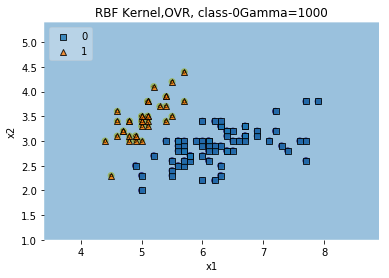

Class: 1


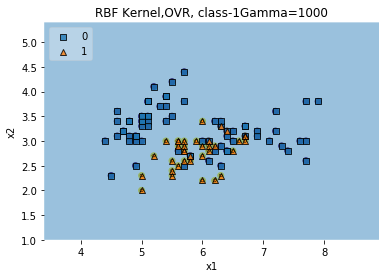

Class: 2


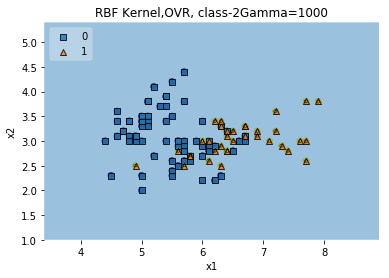


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.5833333333333334  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9537037037037037  ValidationScore: 0.6666666666666666  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9537037037037037  ValidationScore: 0.6666666666666666  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.5833333333333334  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.6666666666666666  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.6666666666666666  TestAcc: 0.6333333333333333



******************************Gamma= 1000  K= 7 ******************************
Class: 0


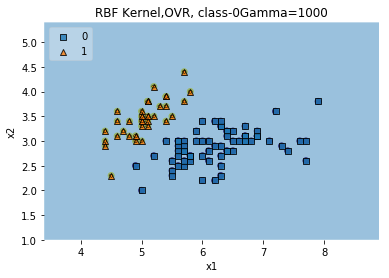

Class: 1


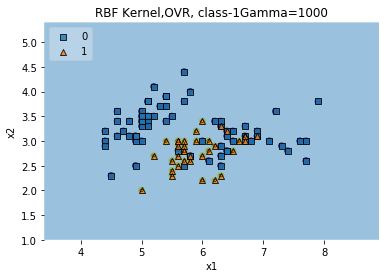

Class: 2


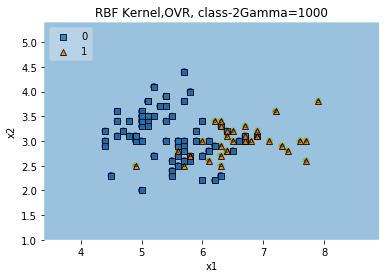


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 0.8
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.6666666666666666  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9444444444444444  ValidationScore: 0.6666666666666666  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 0.8
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.6666666666666666  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.6666666666666666  TestAcc: 0.6333333333333333



******************************Gamma= 1000  K= 8 ******************************
Class: 0


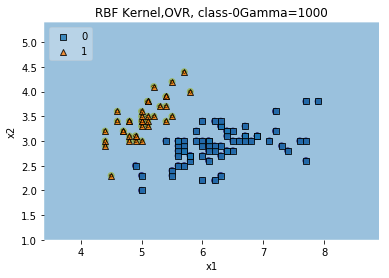

Class: 1


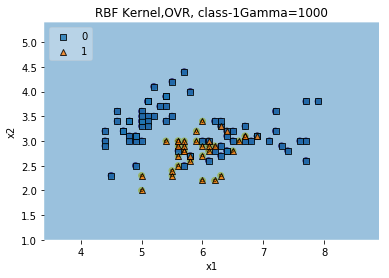

Class: 2


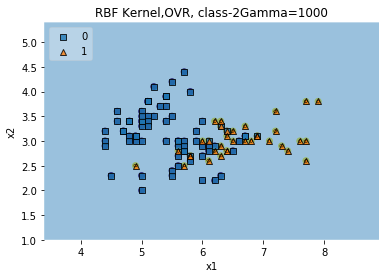


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9537037037037037  ValidationScore: 0.5833333333333334  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9537037037037037  ValidationScore: 0.6666666666666666  TestScore: 0.6666666666666666


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.5833333333333334  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.6666666666666666  TestAcc: 0.6666666666666666



******************************Gamma= 1000  K= 9 ******************************
Class: 0


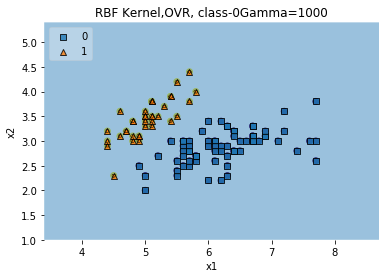

Class: 1


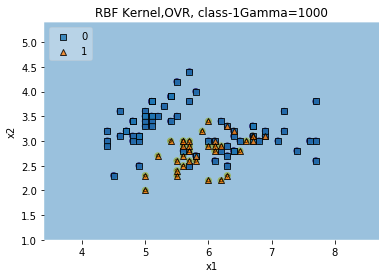

Class: 2


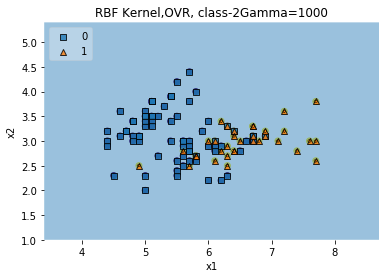


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.6666666666666666  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9351851851851852  ValidationScore: 0.8333333333333334  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.9351851851851852  ValidationScore: 0.5833333333333334  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.6666666666666666  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.8333333333333334  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.5833333333333334  TestAcc: 0.6333333333333333



******************************Gamma= 1000  K= 10 ******************************
Class: 0


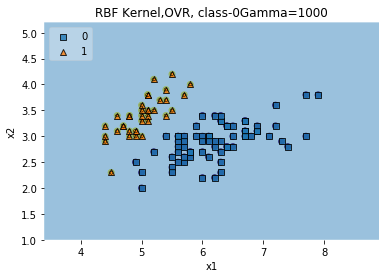

Class: 1


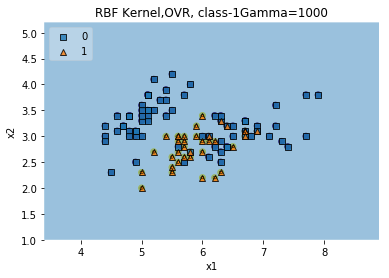

Class: 2


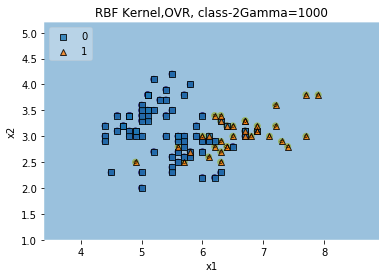


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9351851851851852  ValidationScore: 0.8333333333333334  TestScore: 0.6
Class: 2 	TrainScore: 0.9351851851851852  ValidationScore: 0.6666666666666666  TestScore: 0.6666666666666666


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.8333333333333334  TestAcc: 0.6
Class: 2 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.6666666666666666  TestAcc: 0.6666666666666666



 Mean Scores and Accuracies: 
Train Score mean: [0.96296296 0.96296296 0.95679012 0.9691358  0.96296296 0.9691358
 0.96296296 0.9691358  0.95679012 0.95679012] 
Validation Score mean: [0.77777778 0.80555556 0.69444444 0.66666667 0.69444444 0.63888889
 0.72222222 0.69444444 0.69444444 0.77777778] \Test Score mean: [0.7        0.68888889 0.7        0.7        0.67777778 0.7
 0.68888889 0.71111111 0

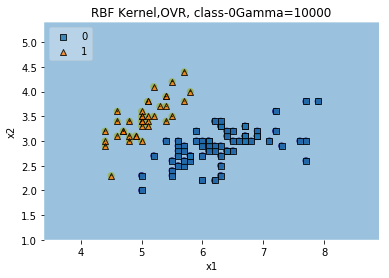

Class: 1


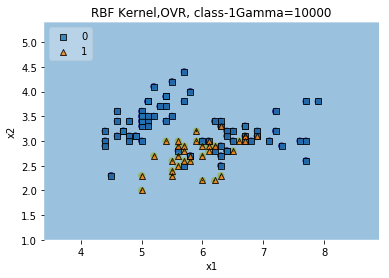

Class: 2


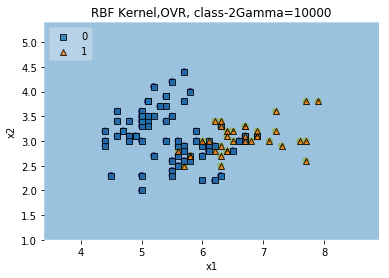


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.9166666666666666  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.75  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9444444444444444  ValidationScore: 0.6666666666666666  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.9166666666666666  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.75  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.6666666666666666  TestAcc: 0.6333333333333333



******************************Gamma= 10000  K= 2 ******************************
Class: 0


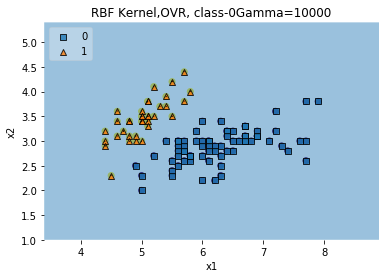

Class: 1


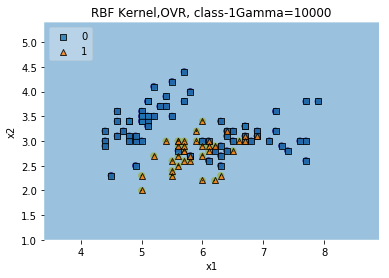

Class: 2


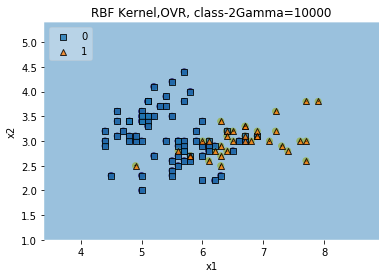


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 0.8
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.8333333333333334  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9444444444444444  ValidationScore: 0.75  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 0.8
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.8333333333333334  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.75  TestAcc: 0.6333333333333333



******************************Gamma= 10000  K= 3 ******************************
Class: 0


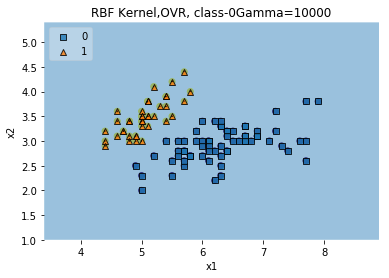

Class: 1


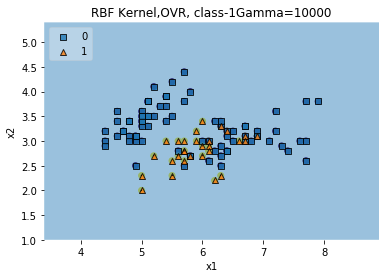

Class: 2


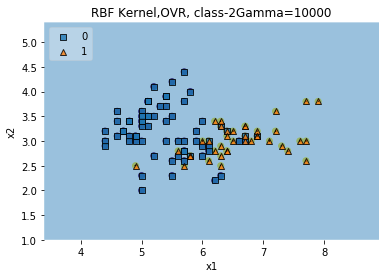


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9351851851851852  ValidationScore: 0.25  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9351851851851852  ValidationScore: 1.0  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.25  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9351851851851852  ValidationAcc: 1.0  TestAcc: 0.6333333333333333



******************************Gamma= 10000  K= 4 ******************************
Class: 0


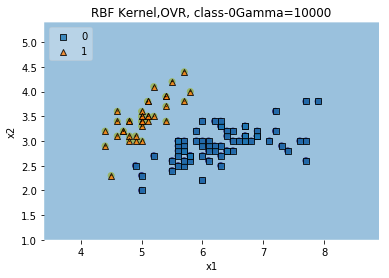

Class: 1


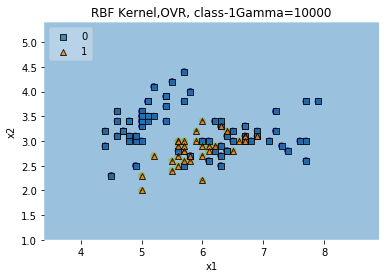

Class: 2


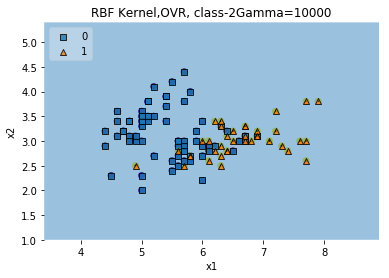


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.6666666666666666  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9537037037037037  ValidationScore: 0.5  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9537037037037037  ValidationScore: 0.8333333333333334  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.6666666666666666  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.5  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.8333333333333334  TestAcc: 0.6333333333333333



******************************Gamma= 10000  K= 5 ******************************
Class: 0


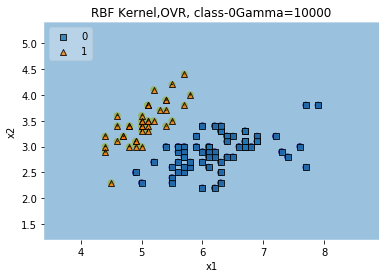

Class: 1


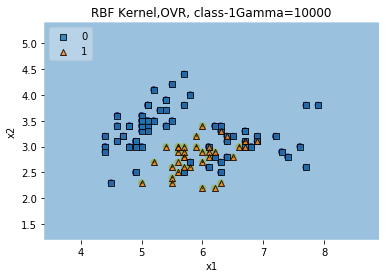

Class: 2


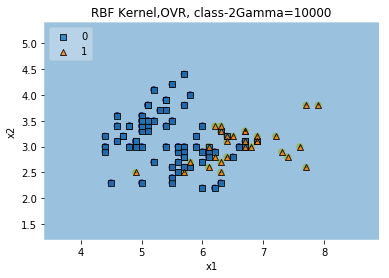


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.9166666666666666  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.8333333333333334  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9444444444444444  ValidationScore: 0.3333333333333333  TestScore: 0.5666666666666667


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.9166666666666666  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.8333333333333334  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.3333333333333333  TestAcc: 0.5666666666666667



******************************Gamma= 10000  K= 6 ******************************
Class: 0


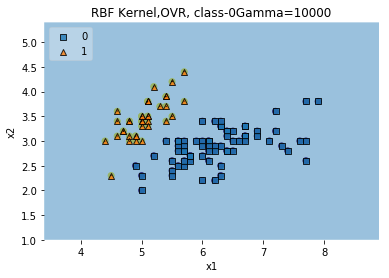

Class: 1


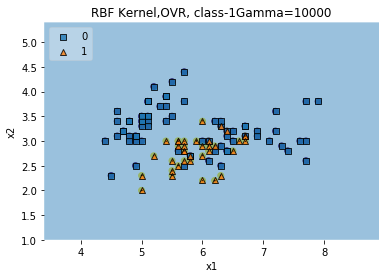

Class: 2


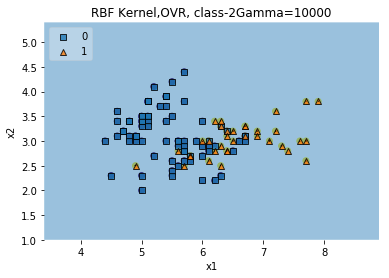


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.5833333333333334  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9537037037037037  ValidationScore: 0.6666666666666666  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9537037037037037  ValidationScore: 0.6666666666666666  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.5833333333333334  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.6666666666666666  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.6666666666666666  TestAcc: 0.6333333333333333



******************************Gamma= 10000  K= 7 ******************************
Class: 0


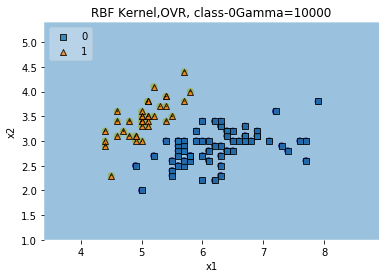

Class: 1


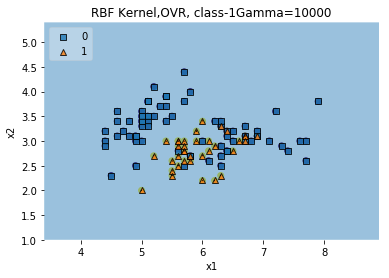

Class: 2


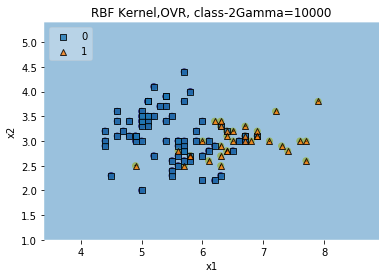


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 0.8
Class: 1 	TrainScore: 0.9444444444444444  ValidationScore: 0.6666666666666666  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9444444444444444  ValidationScore: 0.6666666666666666  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 0.8
Class: 1 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.6666666666666666  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9444444444444444  ValidationAcc: 0.6666666666666666  TestAcc: 0.6333333333333333



******************************Gamma= 10000  K= 8 ******************************
Class: 0


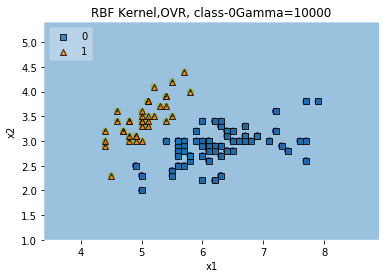

Class: 1


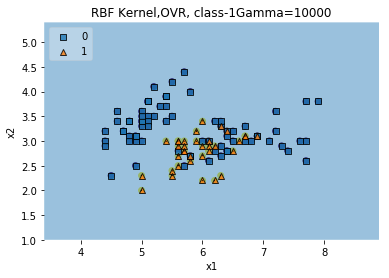

Class: 2


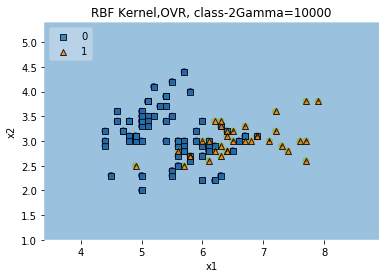


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9537037037037037  ValidationScore: 0.5833333333333334  TestScore: 0.6333333333333333
Class: 2 	TrainScore: 0.9537037037037037  ValidationScore: 0.6666666666666666  TestScore: 0.6666666666666666


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.5833333333333334  TestAcc: 0.6333333333333333
Class: 2 	TrainAcc: 0.9537037037037037  ValidationAcc: 0.6666666666666666  TestAcc: 0.6666666666666666



******************************Gamma= 10000  K= 9 ******************************
Class: 0


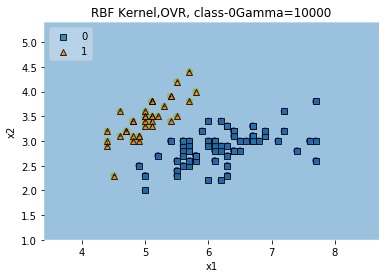

Class: 1


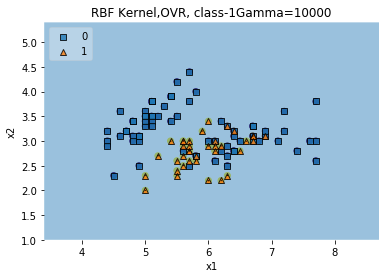

Class: 2


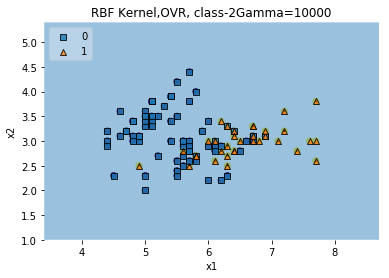


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.6666666666666666  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9351851851851852  ValidationScore: 0.8333333333333334  TestScore: 0.6666666666666666
Class: 2 	TrainScore: 0.9351851851851852  ValidationScore: 0.5833333333333334  TestScore: 0.6333333333333333


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.6666666666666666  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.8333333333333334  TestAcc: 0.6666666666666666
Class: 2 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.5833333333333334  TestAcc: 0.6333333333333333



******************************Gamma= 10000  K= 10 ******************************
Class: 0


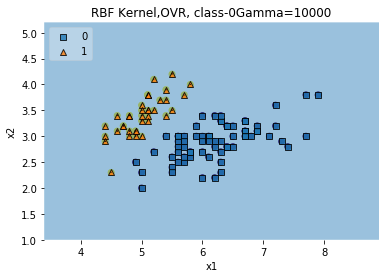

Class: 1


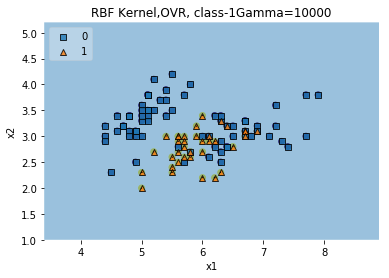

Class: 2


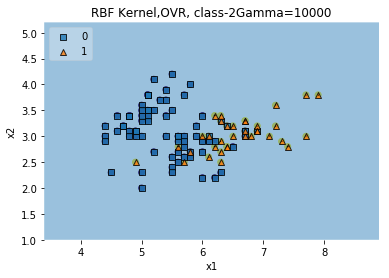


Scores:
Class: 0 	TrainScore: 1.0  ValidationScore: 0.8333333333333334  TestScore: 0.8333333333333334
Class: 1 	TrainScore: 0.9351851851851852  ValidationScore: 0.8333333333333334  TestScore: 0.6
Class: 2 	TrainScore: 0.9351851851851852  ValidationScore: 0.6666666666666666  TestScore: 0.6666666666666666


Accuracies
Class: 0 	TrainAcc: 1.0  ValidationAcc: 0.8333333333333334  TestAcc: 0.8333333333333334
Class: 1 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.8333333333333334  TestAcc: 0.6
Class: 2 	TrainAcc: 0.9351851851851852  ValidationAcc: 0.6666666666666666  TestAcc: 0.6666666666666666



 Mean Scores and Accuracies: 
Train Score mean: [0.96296296 0.96296296 0.95679012 0.9691358  0.96296296 0.9691358
 0.96296296 0.9691358  0.95679012 0.95679012] 
Validation Score mean: [0.77777778 0.80555556 0.69444444 0.66666667 0.69444444 0.63888889
 0.72222222 0.69444444 0.69444444 0.77777778] \Test Score mean: [0.7        0.68888889 0.7        0.7        0.67777778 0.7
 0.68888889 0.71111111 0

In [6]:
partitions_x, partitions_y = getKFoldPartitions(dataX_train,dataY_train,KFold)

eachGammaClassifiers=[]
for gamma in gammaList:
    classifiers_all=[]
    
    train_scores_mean, validation_scores_mean, test_scores_mean=[], [], []
    train_accuracies_mean, validation_accuracies_mean, test_accuracies_mean=[], [], []
    for partition in range(0, KFold):  # each fold training,validation and testing
        print('\n\n******************************Gamma=',gamma,' K=',partition+1,'******************************')
        validationBlock = partition
        temp_X, temp_Y = [], []
        for block in range(0, KFold):
            if (block == validationBlock):
                continue
            temp_X.append(partitions_x[block])
            temp_Y.append(partitions_y[block])

        X_input_train = np.concatenate(temp_X, axis=0)
        Y_input_train = np.concatenate(temp_Y, axis=0)
        X_input_validation = np.asarray(partitions_x[validationBlock])
        Y_input_validation = np.asarray(partitions_y[validationBlock])

        classifiers, train_scores,train_accuracies = OVRTrain(X_input_train,Y_input_train,gamma)
        validation_scores, validation_accuracies = OVRValidation(X_input_validation, Y_input_validation, classifiers)
        test_scores, test_accuracies= OVRTest(dataX_test,dataY_test,classifiers)

        classifiers_all.append(classifiers) # Models for each K
        train_scores_mean.append(train_scores) # train scores of each Model for each K
        train_accuracies_mean.append(train_accuracies) # train accuracies of each Model for each K

        validation_scores_mean.append(validation_scores) # Validation scores of each Model for each K
        validation_accuracies_mean.append(validation_accuracies) # Validation accuracies of each Model for each K

        test_scores_mean.append(test_scores)
        test_accuracies_mean.append(test_accuracies)

        printScores(train_scores,validation_scores,test_scores)
        printAccuracies(train_accuracies,validation_accuracies,test_accuracies)

    train_scores_mean = np.asarray(train_scores_mean)
    train_accuracies_mean = np.asarray(train_accuracies_mean)

    validation_scores_mean = np.asarray(validation_scores_mean)
    validation_accuracies_mean = np.asarray(validation_accuracies_mean)

    test_scores_mean = np.asarray(test_scores_mean)
    test_accuracies_mean = np.asarray(test_accuracies_mean)
    
    print('\n\n Mean Scores and Accuracies:',
      '\nTrain Score mean:',np.mean(train_scores_mean,axis=1),
      '\nValidation Score mean:',np.mean(validation_scores_mean,axis=1),
      '\Test Score mean:',np.mean(test_scores_mean,axis=1),
      '\nTrain Accuracy mean:',np.mean(train_accuracies_mean,axis=1),
      '\nValidation Accuracy mean:',np.mean(validation_accuracies_mean,axis=1),
      '\nTest Accuracy mean:',np.mean(test_accuracies_mean,axis=1))
    
    eachGammaClassifiers.append(classifiers_all)

### OVA , default CV



------------------------Class: 0 ------------------------



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


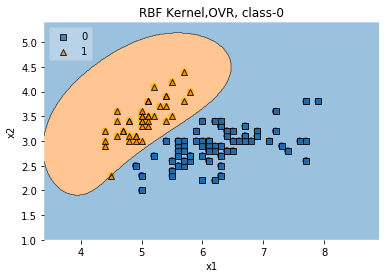

The best parameters are {'gamma': 1} with a score of 0.99
Train Score: 0.9916666666666667  Test Score: 1.0
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.98      0.99        42

   micro avg       0.99      0.99      0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



------------------------Class: 1 ------------------------



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


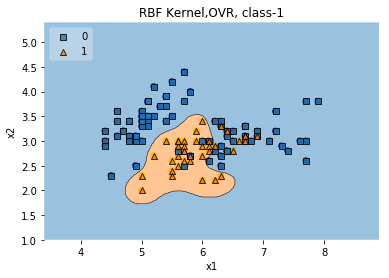

The best parameters are {'gamma': 10} with a score of 0.80
Train Score: 0.875  Test Score: 0.7
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        81
           1       0.83      0.77      0.80        39

   micro avg       0.88      0.88      0.88       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.87      0.88      0.87       120

              precision    recall  f1-score   support

           0       0.73      0.84      0.78        19
           1       0.62      0.45      0.53        11

   micro avg       0.70      0.70      0.70        30
   macro avg       0.68      0.65      0.65        30
weighted avg       0.69      0.70      0.69        30



------------------------Class: 2 ------------------------



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


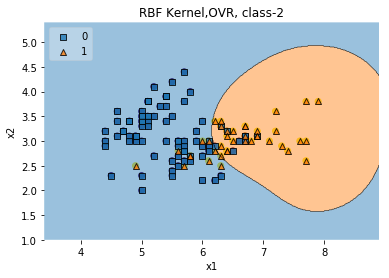

The best parameters are {'gamma': 1} with a score of 0.82
Train Score: 0.8416666666666667  Test Score: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        81
           1       0.76      0.74      0.75        39

   micro avg       0.84      0.84      0.84       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.84      0.84      0.84       120

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.67      0.73      0.70        11

   micro avg       0.77      0.77      0.77        30
   macro avg       0.75      0.76      0.75        30
weighted avg       0.77      0.77      0.77        30



In [7]:
for classNumber in range(0, len(data_classes)):
    print('\n\n------------------------Class:', classNumber,'------------------------\n')
    yTrain, yTest = copy.deepcopy(dataY_train), copy.deepcopy(dataY_test)
    yTrain = modifyClasses(classNumber, yTrain)
    yTest = modifyClasses(classNumber, yTest)


    cv = StratifiedKFold(n_splits=KFold, random_state=42)
    grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
    grid.fit(dataX_train, yTrain)
    
    X, Y = dataX_train, np.asarray(yTrain)
    name='RBF Kernel,OVR, class-'+str(classNumber)
    plt.title(name)
    plotBoundary(X,Y,grid)
    
    print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
    
    bestModel = svm.SVC(kernel='rbf',gamma=grid.best_params_['gamma'])
    bestModel.fit(dataX_train,yTrain)
    
    trainScore = bestModel.score(dataX_train, yTrain)
    testScore = bestModel.score(dataX_test, yTest)  # yTest(modified), not dataY_test

    print('Train Score:',trainScore, ' Test Score:',testScore)
    trainAccuracy = accuracy(dataX_train, yTrain,bestModel)
    testAccuracy = accuracy(dataX_test,yTest,bestModel)